# 4. Field of 11 inclined boreholes with curved trajectories : (a) $g$-functions
The model is used to evaluated the $g$-function of a field of 11 boreholes with curved trajectories.

In [1]:
# Import necessary packages
import geothermax as gm

import jax
from jax import numpy as jnp
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import numpy as np

## 4(a).1. Borehole trajectories

### 4(a).1.1. Curved trajectories from drilling logs
The position of the drill was recorded every 10 meters, nominally. The measurements are used to construct polynomial trajectories for the model.

In [2]:
# Points along the trajectories from the drilling logs

D = 2.
offset = jnp.array(
    [
        # [0., 0., -D],
        [0.375186, 1.79956, -D],
        [3.68243, 7.01754, -D],
        [-1.93403, 0.202918, -D],
        [4.92656, 5.57329, -D],
        [3.49819, 1.13551, -D],
        [0.684666, 9.22355, -D],
        [-0.8747, 8.149, -D],
        [0.639719, 4.73926, -D],
        [-5.41151, 0.675605, -D],
        [-2.86632, 2.43128, -D],
        [-2.50714, 7.098, -D],
    ]
)
p = [

        # Borehole 0 is not part of the system and only used for research
        # jnp.array([
        #     [0.00, 0.00, 0.],
        #     [0.01, 0.00, -10.],
        #     [-0.01, 0.01, -20.],
        #     [-0.02, 0.03, -30.],
        #     [0.00, 0.06, -40.],
        #     [0.04, 0.09, -50.],
        #     [0.09, 0.14, -60.],
        #     [0.17, 0.20, -70.],
        #     [0.27, 0.27, -80.],
        #     [0.40, 0.36, -90.],
        #     [0.55, 0.46, -100.],
        # ]),

        jnp.array([
            [0.00, 0.00, 0.00],
            [-0.61, 1.37, -9.84],
            [-0.38, 3.15, -19.68],
            [-0.14, 4.95, -29.51],
            [0.10, 6.73, -39.35],
            [0.28, 8.58, -49.18],
            [0.44, 10.47, -59.00],
            [0.55, 12.36, -68.81],
            [0.60, 14.29, -78.63],
            [0.64, 16.25, -88.43],
            [0.63, 18.27, -98.23],
            [0.57, 20.32, -108.01],
            [0.45, 22.41, -117.79],
            [0.29, 24.54, -127.56],
            [0.11, 26.68, -137.33],
            [-0.08, 28.82, -147.09],
            [-0.25, 30.99, -156.85],
            [-0.35, 33.21, -166.60],
            [-0.38, 35.42, -176.36],
            [-0.38, 37.63, -186.11],
            [-0.35, 39.89, -195.85],
            [-0.32, 42.19, -205.58],
            [-0.34, 44.50, -215.31],
            [-0.38, 45.66, -220.18],
        ]),

        jnp.array([
            [0.00, 0.00, 0.00],
            [0.67, 0.54, -9.85],
            [2.16, -0.21, -19.71],
            [3.77, -0.81, -29.55],
            [5.55, -1.14, -39.39],
            [7.28, -1.71, -49.22],
            [9.02, -2.26, -59.05],
            [10.75, -2.63, -68.89],
            [12.47, -3.00, -78.73],
            [14.19, -3.22, -88.58],
            [15.88, -3.54, -98.43],
            [17.59, -3.86, -108.28],
            [19.33, -4.20, -118.12],
            [21.05, -4.61, -127.96],
            [22.82, -4.86, -137.80],
            [24.62, -5.16, -147.63],
            [26.36, -5.51, -157.47],
            [28.15, -5.74, -167.30],
            [30.01, -6.09, -177.12],
            [31.72, -6.62, -186.96],
            [33.31, -7.28, -196.81],
            [34.87, -7.90, -206.67],
            [36.33, -8.33, -216.55],
            [37.02, -8.57, -221.50],
        ]),

        jnp.array([
            [0.00, 0.00, 0.00],
            [-0.05, -0.21, -9.85],
            [-1.77, -0.14, -19.70],
            [-3.44, -0.05, -29.56],
            [-5.06, 0.14, -39.42],
            [-6.64, 0.44, -49.30],
            [-8.24, 0.70, -59.16],
            [-9.91, 1.05, -69.02],
            [-11.58, 1.40, -78.87],
            [-13.26, 1.66, -88.72],
            [-14.93, 1.98, -98.58],
            [-16.56, 2.34, -108.44],
            [-18.07, 2.76, -118.31],
            [-19.51, 3.18, -128.20],
            [-20.86, 3.49, -138.10],
            [-22.10, 3.76, -148.02],
            [-23.30, 3.96, -157.95],
            [-24.46, 4.08, -167.88],
            [-25.57, 4.16, -177.82],
            [-26.63, 4.22, -187.76],
            [-27.70, 4.28, -197.70],
            [-28.76, 4.33, -207.65],
            [-29.79, 4.42, -217.59],
            [-30.29, 4.50, -222.57],
        ]),

        jnp.array([
            [0.00, 0.00, 0.00],
            [0.52, 0.47, -9.97],
            [1.15, 0.78, -19.95],
            [1.78, 1.06, -29.92],
            [2.24, 1.60, -39.89],
            [2.65, 2.18, -49.87],
            [3.04, 2.78, -59.84],
            [3.43, 3.43, -69.81],
            [3.86, 4.13, -79.78],
            [4.34, 4.89, -89.74],
            [4.81, 5.66, -99.70],
            [5.27, 6.45, -109.66],
            [5.72, 7.27, -119.61],
            [6.19, 8.12, -129.56],
            [6.70, 9.02, -139.51],
            [7.29, 9.95, -149.45],
            [7.92, 10.88, -159.39],
            [8.59, 11.81, -169.32],
            [9.25, 12.72, -179.26],
            [9.93, 13.61, -189.19],
            [10.63, 14.50, -199.13],
            [11.29, 15.40, -209.07],
            [11.90, 16.28, -219.01],
            [12.52, 17.12, -228.96],
            [13.17, 17.92, -238.90],
            [13.84, 18.64, -248.85],
            [14.52, 19.30, -258.81],
            [15.19, 19.99, -268.76],
            [15.85, 20.69, -278.71],
            [16.53, 21.33, -288.67],
            [17.20, 21.99, -298.63],
        ]),

        jnp.array([
            [0.00, 0.00, 0.00],
            [0.57, 0.73, -9.94],
            [1.58, 1.12, -19.88],
            [2.59, 1.49, -29.83],
            [3.65, 1.87, -39.76],
            [4.72, 2.30, -49.70],
            [5.82, 2.75, -59.63],
            [6.94, 3.26, -69.55],
            [8.05, 3.80, -79.47],
            [9.13, 4.34, -89.40],
            [10.21, 4.97, -99.32],
            [11.33, 5.62, -109.24],
            [12.50, 6.25, -119.15],
            [13.69, 6.86, -129.06],
            [14.86, 7.55, -138.96],
            [16.06, 8.30, -148.86],
            [17.33, 9.05, -158.75],
            [18.60, 9.81, -168.64],
            [19.88, 10.58, -178.53],
            [21.21, 11.35, -188.41],
            [22.63, 11.99, -198.29],
            [24.07, 12.59, -208.17],
            [25.51, 13.26, -218.04],
            [26.96, 13.87, -227.92],
            [28.38, 14.54, -237.79],
            [29.79, 15.29, -247.66],
            [31.23, 16.05, -257.53],
            [32.69, 16.81, -267.39],
        ]),

        jnp.array([
            [0.00, 0.00, 0.00],
            [0.60, -0.09, -9.95],
            [1.52, -0.86, -19.88],
            [2.41, -1.68, -29.81],
            [3.33, -2.47, -39.73],
            [4.25, -3.22, -49.66],
            [5.20, -3.99, -59.59],
            [6.21, -4.76, -69.51],
            [7.22, -5.49, -79.43],
            [8.26, -6.18, -89.35],
            [9.35, -6.87, -99.27],
            [10.54, -7.57, -109.17],
            [11.74, -8.34, -119.07],
            [12.93, -9.17, -128.96],
            [14.21, -9.94, -138.85],
            [15.58, -10.70, -148.73],
            [17.02, -11.59, -158.58],
            [18.52, -12.60, -168.42],
            [19.90, -13.77, -178.25],
            [21.39, -14.93, -188.07],
            [23.10, -16.00, -197.86],
            [24.84, -17.13, -207.64],
            [26.63, -18.28, -217.41],
            [28.48, -19.45, -227.17],
            [30.36, -20.56, -236.93],
            [32.28, -21.69, -246.68],
            [34.22, -22.91, -256.41],
            [36.16, -24.21, -266.13],
        ]),

        jnp.array([
            [0.00, 0.00, 0.00],
            [0.27, -0.36, -9.99],
            [0.50, -1.02, -19.96],
            [0.73, -1.65, -29.94],
            [0.95, -2.25, -39.92],
            [1.13, -2.85, -49.90],
            [1.34, -3.47, -59.88],
            [1.57, -4.09, -69.86],
            [1.75, -4.71, -79.83],
            [1.94, -5.36, -89.81],
            [2.21, -5.97, -99.79],
            [2.48, -6.58, -109.77],
            [2.71, -7.25, -119.74],
            [2.95, -7.93, -129.71],
            [3.21, -8.59, -139.69],
            [3.47, -9.31, -149.66],
            [3.83, -10.10, -159.62],
            [4.33, -10.91, -169.58],
            [4.90, -11.75, -179.52],
            [5.55, -12.66, -189.46],
            [6.28, -13.56, -199.39],
            [7.10, -14.49, -209.32],
            [7.98, -15.47, -219.23],
            [8.97, -16.51, -229.13],
            [10.03, -17.65, -239.00],
            [11.09, -18.91, -248.87],
            [12.16, -20.28, -258.72],
            [13.22, -21.73, -268.55],
            [14.28, -23.25, -278.38],
            [15.40, -24.86, -288.19],
            [16.56, -26.50, -297.98],
            [17.72, -28.18, -307.77],
            [18.82, -29.92, -317.56],
            [19.89, -31.68, -327.34],
            [20.92, -33.48, -337.12],
            [21.86, -35.36, -346.90],
        ]),

        jnp.array([
            [0.00, 0.00, 0.00],
            [-0.09, -0.08, -9.98],
            [-0.40, -0.66, -19.96],
            [-0.74, -1.18, -29.94],
            [-1.11, -1.67, -39.92],
            [-1.47, -2.17, -49.90],
            [-1.86, -2.63, -59.89],
            [-2.29, -3.07, -69.87],
            [-2.73, -3.49, -79.85],
            [-3.21, -3.86, -89.83],
            [-3.72, -4.19, -99.81],
            [-4.25, -4.48, -109.79],
            [-4.74, -4.78, -119.78],
            [-5.19, -5.09, -129.76],
            [-5.60, -5.40, -139.75],
            [-5.96, -5.78, -149.73],
            [-6.26, -6.26, -159.72],
            [-6.48, -6.82, -169.70],
            [-6.64, -7.42, -179.68],
            [-6.81, -8.06, -189.66],
            [-6.94, -8.77, -199.63],
            [-7.02, -9.59, -209.60],
            [-7.10, -10.48, -219.56],
            [-7.13, -11.40, -229.52],
            [-7.09, -12.40, -239.46],
            [-6.93, -13.46, -249.41],
            [-6.66, -14.58, -259.34],
            [-6.38, -15.76, -269.27],
            [-6.17, -17.00, -279.19],
            [-6.00, -18.32, -289.10],
            [-5.83, -19.70, -299.00],
            [-5.66, -21.10, -308.90],
            [-5.48, -22.50, -318.80],
            [-5.31, -23.95, -328.69],
            [-5.19, -25.46, -338.58],
            [-5.10, -27.02, -348.45],
        ]),

        jnp.array([
            [0.00, 0.00, 0.00],
            [-0.64, 0.32, -9.94],
            [-1.69, 0.00, -19.88],
            [-2.73, -0.35, -29.82],
            [-3.71, -0.70, -39.77],
            [-4.69, -1.03, -49.72],
            [-5.67, -1.32, -59.66],
            [-6.65, -1.57, -69.61],
            [-7.62, -1.81, -79.56],
            [-8.59, -2.07, -89.51],
            [-9.54, -2.35, -99.46],
            [-10.48, -2.66, -109.41],
            [-11.38, -2.99, -119.37],
            [-12.25, -3.33, -129.32],
            [-13.09, -3.69, -139.28],
            [-13.86, -4.19, -149.24],
            [-14.58, -4.85, -159.19],
            [-15.22, -5.61, -169.14],
            [-15.79, -6.48, -179.09],
            [-16.33, -7.49, -189.02],
            [-16.88, -8.71, -198.93],
            [-17.48, -10.07, -208.82],
            [-18.13, -11.47, -218.70],
            [-18.81, -12.90, -228.57],
            [-19.46, -14.39, -238.44],
            [-20.06, -15.93, -248.30],
            [-20.57, -17.49, -258.17],
            [-20.91, -19.08, -268.03],
            [-21.15, -20.72, -277.89],
            [-21.34, -22.41, -287.75],
            [-21.49, -24.14, -297.60],
        ]),

        jnp.array([
            [0.00, 0.00, 0.00],
            [-1.06, 0.35, -9.92],
            [-1.99, 1.19, -19.85],
            [-2.94, 2.00, -29.77],
            [-3.96, 2.78, -39.68],
            [-4.98, 3.57, -49.60],
            [-5.91, 4.34, -59.53],
            [-6.84, 5.12, -69.45],
            [-7.83, 5.94, -79.37],
            [-8.89, 6.83, -89.27],
            [-9.99, 7.76, -99.17],
            [-11.14, 8.67, -109.06],
            [-12.28, 9.58, -118.95],
            [-13.40, 10.49, -128.85],
            [-14.50, 11.39, -138.75],
            [-15.64, 12.20, -148.65],
            [-16.80, 12.90, -158.56],
            [-17.95, 13.59, -168.47],
            [-19.13, 14.27, -178.37],
            [-20.29, 15.00, -188.28],
            [-21.41, 15.80, -198.18],
            [-22.52, 16.56, -208.09],
            [-23.65, 17.32, -218.00],
            [-24.79, 18.07, -227.91],
            [-25.97, 18.79, -237.81],
            [-27.15, 19.52, -247.71],
            [-28.33, 20.27, -257.61],
            [-29.57, 21.01, -267.51],
        ]),

        jnp.array([
            [0.00, 0.00, 0.00],
            [-0.64, 0.31, -9.96],
            [-0.94, 0.97, -19.93],
            [-1.30, 1.61, -29.91],
            [-1.62, 2.29, -39.88],
            [-1.88, 2.99, -49.85],
            [-2.19, 3.67, -59.82],
            [-2.51, 4.45, -69.79],
            [-2.82, 5.23, -79.75],
            [-3.21, 5.94, -89.72],
            [-3.60, 6.72, -99.68],
            [-3.94, 7.51, -109.64],
            [-4.33, 8.30, -119.60],
            [-4.76, 9.14, -129.56],
            [-5.10, 10.00, -139.52],
            [-5.37, 10.84, -149.48],
            [-5.63, 11.70, -159.44],
            [-5.92, 12.60, -169.39],
            [-6.24, 13.53, -179.34],
            [-6.48, 14.48, -189.29],
            [-6.67, 15.42, -199.25],
            [-6.87, 16.36, -209.20],
            [-7.01, 17.30, -219.16],
            [-7.12, 18.23, -229.11],
            [-7.28, 19.12, -239.07],
            [-7.47, 20.00, -249.03],
            [-7.68, 20.86, -258.99],
            [-7.89, 21.68, -268.96],
            [-8.09, 22.45, -278.92],
            [-8.31, 23.16, -288.90],
            [-8.57, 23.83, -298.87],
        ])

    ]

p = [_p + _offset for _p, _offset in zip(p, offset)]

A 6th order polynomial is used to represent the trajectory of each borehole.

In [3]:
paths = [gm.Path(jnp.linspace(-1., 1., num=_p.shape[0]), _p, order=6, s_order=10) for _p in p]

### 4(a).1.2. Straight trajectories from the initial drilling direction
The $g$-function will be compared to a case where straight trajectories are used by the model, assuming that boreholes follow the initial drilling trajectory. The trajectory of the boreholes are thus extrapolated from the first 40 meters of the boreholes.

In [4]:
n_path = 4
paths_straight = []
for _p, _path in zip(p, paths):
    xi = jnp.linspace(-1., 1., num=_p.shape[0])
    s = _path.f_s(xi)
    L = jnp.diff(_path.f_s(jnp.array([-1., 1.])))[0]
    coefs = jnp.array(np.polyfit(s[:n_path], _p[:n_path], 1))
    fun = lambda _eta: jnp.polyval(coefs, _eta)
    p_straight = jax.vmap(fun, in_axes=0)(jnp.array([0., L]))
    paths_straight.append(gm.Path(jnp.array([-1., 1.]), p_straight))

# 4(a).2. $g$-Functions of the borefield

### 4.2.1. Simulation parameters

In [5]:
m_flow = 0.375  # Fluid mass flow rate (in kg/s)
m_flow_network = m_flow * len(paths)  # Fluid mass flow rate (in kg/s)
cp_f = 3977.    # Fluid specific heat capacity (in J/kg-K)
alpha = 1e-6
k_s = 2.

# Delta-circuit thermal resistances (in m-K/W)
R_d = jnp.array(
    [
        [0.28669298, -3.18697907],
        [-3.18697907, 0.28669298]
    ]
)

r_b = 0.075

The $g$-functions are evaluated 101 time values.

In [6]:
Nt = 101                    # Number of time steps
lntts = jnp.linspace(-10., 5., num=Nt)

The ground temperature field at $z=-150$ m is also evaluated.

In [7]:
z = -150.
x = jnp.linspace(-40., 50., num=91)
y = jnp.linspace(-30., 50., num=81)
x_grid, y_grid = jnp.meshgrid(x, y)
n_points = len(x_grid.flatten())
pT = jnp.stack((x_grid.flatten(), y_grid.flatten(), jnp.broadcast_to(z, n_points)), axis=1)

### 4(a).2.2. Initialization of `Borefield` objects
5 segments of 7 nodes are used for the evaluation of the $g$-functions. The trajectories of the boreholes are very close near the top. The discretization is thus refined near the top of the boreholes.

In [8]:
n_nodes = 7
n_segments = 5
segment_ratios = jnp.array([0.05, 0.1, 0.3, 0.3, 0.25])
basis = gm.Basis.Legendre(n_nodes)

In [9]:
boreholes = [
    gm.SingleUTube(R_d, r_b, path, basis, n_segments, segment_ratios=segment_ratios)
    for path in paths
]
borefield = gm.Network(boreholes)

In [10]:
boreholes_straight = [
    gm.SingleUTube(R_d, r_b, path, basis, n_segments, segment_ratios=segment_ratios)
    for path in paths_straight
]
borefield_straight = gm.Network(boreholes_straight)

In [11]:
ts = borefield.L.mean()**2 / (9 * alpha)    # Bore field characteristic time
time = jnp.exp(lntts) * ts

The borefield with curved boreholes is visualized

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


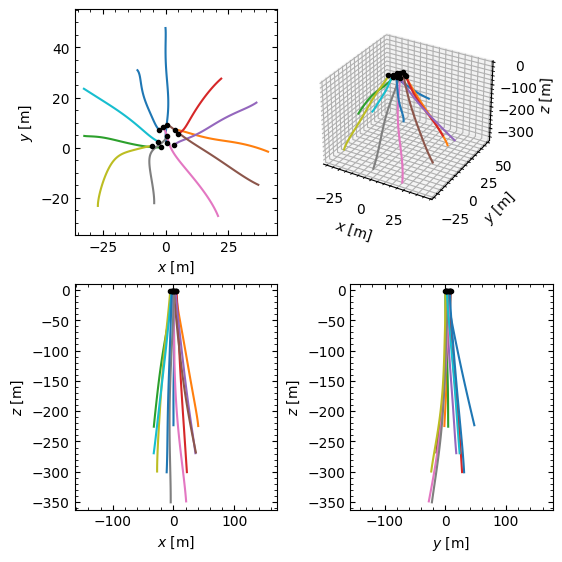

In [12]:
# Plot borefield
fig, axs = gm.utilities.plot_borefield(borefield);
axs[1].set_position([0.55, 0.5, 0.35, 0.6], which='both')
fig.set_size_inches(140. / 25.4, 140. / 25.4)
fig.savefig('borefield-KTH.eps')

The top-view is compared with the field of straight boreholes.

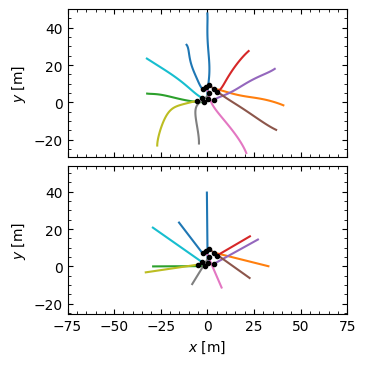

In [13]:
# Compare top-view of curved and straight boreholes
fig, axs = plt.subplots(nrows=2, layout='constrained', sharex=True)
axs[0] = gm.utilities.plot_borefield(borefield, ax=axs[0], view='xy');
axs[0].set_xlabel(None)
axs[0].set_aspect('equal')
axs[1] = gm.utilities.plot_borefield(borefield_straight, ax=axs[1], view='xy');
axs[1].set_aspect('equal')
axs[1].set_xlim(-75, 75)
fig.set_size_inches(90. / 25.4, 90. / 25.4)
fig.savefig('straight-borefield-KTH.eps')

## 4(a).3. $g$-Function of the borefield
A `gFunction` object is instantiated for each borefield and the $g$-functions are evaluated.

In [14]:
gfunc = gm.gFunction(borefield, m_flow_network, cp_f, time, alpha, k_s, p=pT)
gfunc.simulate()

In [15]:
gfunc_straight = gm.gFunction(borefield_straight, m_flow_network, cp_f, time, alpha, k_s, p=None)
gfunc_straight.simulate()

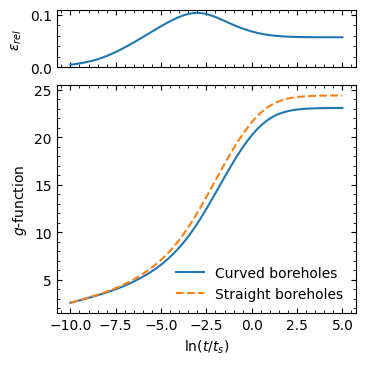

In [16]:
# Plot g-functions
fig, axs = plt.subplots(nrows=2, layout='constrained', height_ratios=[0.2, 0.8], sharex=True)

axs[0] = gm.utilities._format_axis(axs[0], axis_labels=[None, r'$\varepsilon_{rel}$']);
axs[0].plot(lntts, (gfunc_straight.g - gfunc.g) / gfunc.g, '-');
axs[0].set_ylim(0, None)

axs[1] = gm.utilities._format_axis(axs[1], axis_labels=[r'$\ln(t/t_s)$', r'$g$-function']);
axs[1].plot(lntts, gfunc.g, '-', label='Curved boreholes');
axs[1].plot(lntts, gfunc_straight.g, '--', label='Straight boreholes');
axs[1].legend(frameon=False);
fig.set_size_inches(90. / 25.4, 90. / 25.4)
fig.savefig('gFunction-KTH.eps')

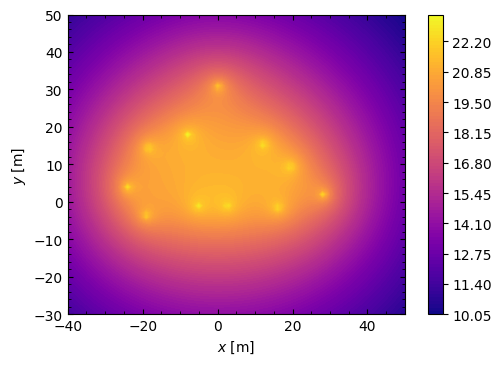

In [17]:
# Plot ground temperature field
fig, ax = plt.subplots(layout='constrained')
ax = gm.utilities._format_axis(ax, axis_labels=[r'$x$ [m]', r'$y$ [m]'], equal=True);
contourf_ = ax.contourf(x_grid, y_grid, gfunc.T[-1].reshape(x_grid.shape), levels=100, cmap='plasma');
fig.colorbar(contourf_);
ax.set_aspect('equal', 'box');
fig.set_size_inches(140. / 25.4, 90. / 25.4)
fig.savefig('ground-temperature-KTH.eps')

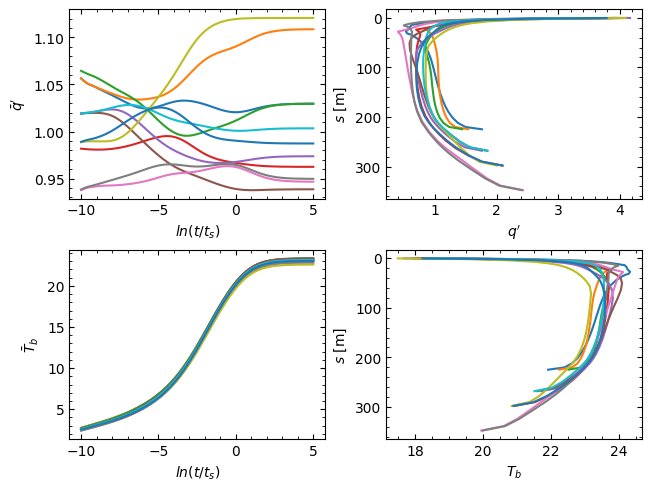

In [18]:
# Plot temperature and heat extraction rate profiles and time-variations
fig, axs = plt.subplots(nrows=2, ncols=2, layout='constrained')
axs = axs.flatten()
k = 0

axs[0] = gm.utilities._format_axis(axs[0], axis_labels=[r'$ln(t/t_s)$', r'$\bar{q}^\prime$'])
q_avg = jnp.einsum('kjv,jv->kj', gfunc.q, borefield.w) / borefield.L / (2 * jnp.pi * k_s)
axs[0].plot(lntts, q_avg);

axs[1] = gm.utilities._format_axis(axs[1], axis_labels=[r'$q^\prime$', r'$s$ [m]'], inverse_y=True)
axs[1].plot(gfunc.q[-1].T / (2 * jnp.pi * k_s), borefield.s.T);

axs[2] = gm.utilities._format_axis(axs[2], axis_labels=[r'$ln(t/t_s)$', r'$\bar{T}_b$'])
T_b_avg = jnp.einsum('kjv,jv->kj', gfunc.T_b, borefield.w) / borefield.L
axs[2].plot(lntts, T_b_avg);

axs[3] = gm.utilities._format_axis(axs[3], axis_labels=[r'$T_b$', r'$s$ [m]'], inverse_y=True)
axs[3].plot(gfunc.T_b[-1].T, borefield.s.T);